In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir("../data"))

C:\Users\3731545\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


['gender_submission.csv', 'test.csv', 'train.csv']


## Data Dictonary

    Variable	Definition	    Key
    survival	Survival	    0 = No, 1 = Yes
    pclass	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	     Sex	
    Age	     Age in years	
    sibsp	   # of siblings / spouses aboard the Titanic	
    parch	   # of parents / children aboard the Titanic	
    ticket	  Ticket number	
    fare	    Passenger fare	
    cabin	   Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Note

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
#read in the row data
test_df = pd.read_csv('../data/test.csv')
train_df = pd.read_csv('../data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df = train_df.set_index('PassengerId')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
#data processing
train_df.shape

(891, 11)

In [9]:
#train_df_df processing
train_df.isnull().sum() # check the number of null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

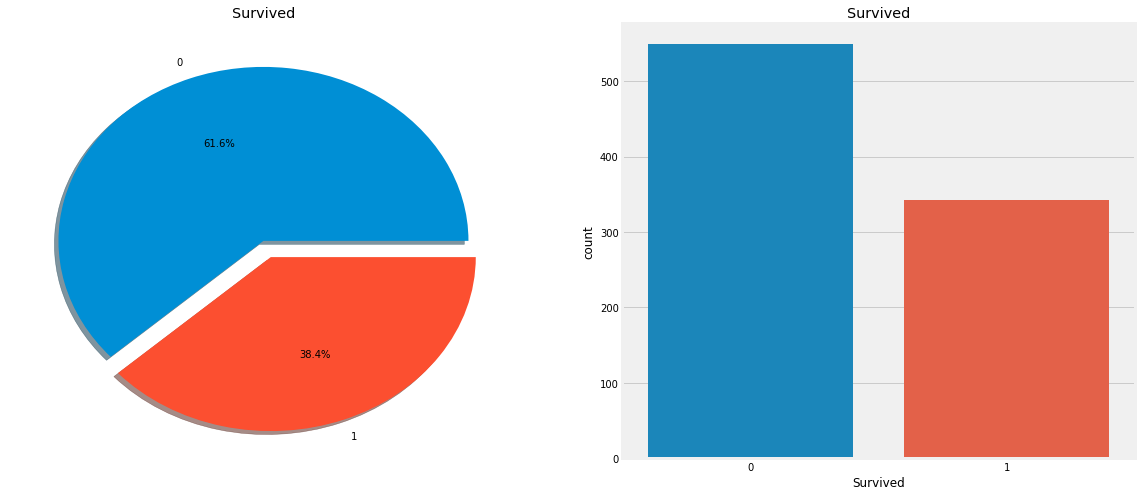

In [10]:
#dependant variable
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [11]:
#feature analysis-Sex (categorical feature)
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

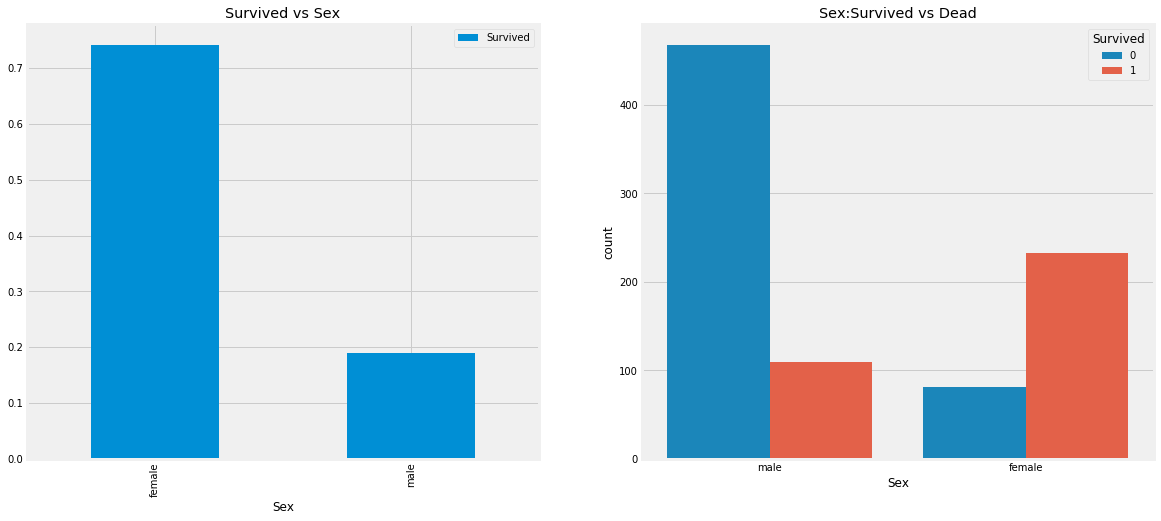

In [12]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [13]:
#feature analysis-Pclass (Ordinal feature)
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


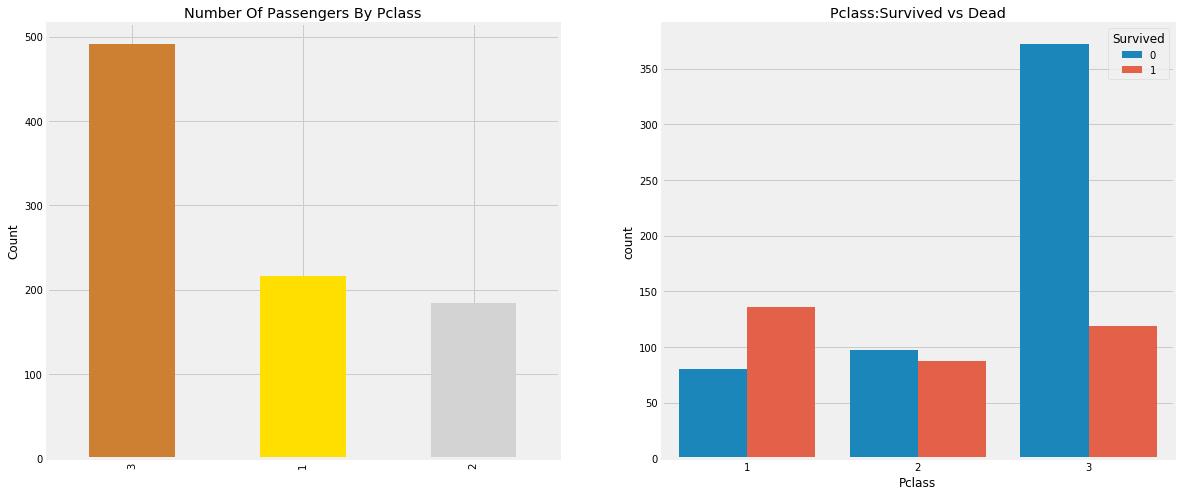

In [14]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [15]:
# feature analysis-Sex and Pclass together
pd.crosstab([train_df.Sex,train_df.Pclass],train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')


In [16]:
train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female') &(train_df['Pclass'] < 3)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [17]:
train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female') &(train_df['Pclass'] < 3)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [19]:
train_df.groupby(['Pclass','cabin'])['cabin'].count()

KeyError: 'cabin'

In [ ]:
train_df.groupby(['Survived','cabined','cabin_init'])['cabin_init'].count()

In [ ]:
train_df.groupby(['Survived','cabined','Pclass'])['Pclass'].count()

In [ ]:
train_df[(train_df['Survived'] == 0) & (train_df['cabin_init'] != '0') &(train_df['Pclass'] == 3)]

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

In [ ]:
# feature analysis-Age (Continuous feature)
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')


In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
#handle the missig value for Age
#find the Salutations and repace the NaN with the mean of age for that group
train_df['Initial']=0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

In [ ]:
#correct the miss-spelling and replace
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
train_df.groupby(['Initial'])['Age'].mean()

In [ ]:
train_df[train_df['Initial'] == 'Master'].head()

In [ ]:
pd.crosstab(train_df.Initial,train_df.Survived).T.style.background_gradient(cmap='summer_r')

In [ ]:
#replace the NaN with group mean of age (ceil values of the mean)
train_df.groupby('Initial')['Age'].mean() 
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

In [ ]:
# check if there is nay NaN value for Age 
train_df.Age.isnull().any()

In [ ]:
train_df['age_group'] = np.select([train_df.Age <9, (train_df.Age >=9) & (train_df.Age <20), train_df.Age > 55 ], 
                        [1, 2, 4], 
                        default=3)
pd.crosstab(train_df.age_group,train_df.Survived).T.style.background_gradient(cmap='summer_r')

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [ ]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)
plt.show()

In [ ]:
train_df.groupby(['SibSp','Survived'])['Survived'].count()

In [ ]:
train_df.groupby(['Parch','Survived'])['Survived'].count()

In [ ]:
sns.scatterplot('Fare','Pclass',data=train_df)
plt.show()

In [ ]:
sns.scatterplot('Fare','Survived',data=train_df)
plt.show()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Fare", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Fare vs Survived')
ax[0].set_yticks(range(0,550,50))
sns.violinplot("Sex","Fare", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Fare vs Survived')
ax[1].set_yticks(range(0,550,50))
plt.show()

In [ ]:
train_df['Fare_group'] = np.select([train_df.Fare<= 15, (train_df.Fare>15) & (train_df.Fare <=50), train_df.Fare >= 100 ], 
                        [1, 2, 4], 
                        default=3)
pd.crosstab(train_df.Fare_group,train_df.Survived).T.style.background_gradient(cmap='summer_r')

In [ ]:
train_df['Cabin'].value_counts()

In [ ]:
train_df['Cabin'] = train_df['Cabin'].fillna('0')
train_df['cabin_init'] = [x[0] for x in train_df['Cabin']]
train_df['cabin_init'].unique()

In [ ]:
train_df['Cabin'].unique()

In [ ]:
pd.crosstab(train_df.cabin_init,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
train_df['cabined'] = [0 if x == '0' else 1 for x in train_df['cabin_init']]
train_df['cabined'].value_counts()

In [ ]:
train_df['Embarked'].value_counts()

In [ ]:
train_df[train_df['Embarked'].isnull()]

In [ ]:
train_df[train_df['cabin_init']=='B']

In [ ]:
train_df['Embarked'] = train_df['Embarked'].fillna('S') 
train_df['Embarked'].unique()

In [ ]:
train_df[train_df['Embarked'].isnull()]

In [ ]:
#feature engineering 
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#modeling

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
df_y = train_df['Survived']
df_y.head()

In [ ]:
df_X[['Pclass','Fare']].corr()

In [ ]:
df_X = train_df.drop(['Survived','Name','Ticket','Cabin','cabin_init','Age','Fare'],axis = 1)

In [ ]:
df_X.head()

In [ ]:
df_X = pd.get_dummies(df_X, drop_first = True)

In [ ]:
df_X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)

In [ ]:
#### use two models based on Cabin
df_X_Cabin = df_X[df_X['cabined'] == 1].drop(['cabined'],axis = 1)
df_y_Cabin = train_df[train_df['cabined'] == 1]['Survived']

df_X_NoCabin = df_X[df_X['cabined'] == 0].drop(['cabined'],axis = 1)
df_y_NoCabin = train_df[train_df['cabined'] == 0]['Survived']

## 1. random forest tree (not split train dateset yet)

In [ ]:
RF_clf = RandomForestClassifier(max_features = 8, max_depth = 5, random_state = 0)
RF_clf.fit(df_X, df_y)

In [ ]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(RF_clf.score(df_X, df_y)))

In [ ]:
RF_clf2 = RandomForestClassifier(max_features = 8, max_depth = 5, random_state = 0)
RF_clf2.fit(X_train, y_train)

In [ ]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(RF_clf2.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(RF_clf2.score(X_test, y_test)))

In [ ]:
RF_clf3 = RandomForestClassifier(max_features = 8, max_depth = 5, class_weight='balanced', random_state = 0)
print('Cross-validation (accuracy)', cross_val_score(RF_clf3, df_X, df_y, cv=5))


In [ ]:
RF_clf_cabin = RandomForestClassifier(max_features = 8, max_depth = 5, class_weight='balanced', random_state = 0)
print('Cross-validation Cabin(accuracy)', cross_val_score(RF_clf_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(RF_clf_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

## 2. Support Vector Machine

In [ ]:
svc_clf = SVC().fit(df_X, df_y)

In [ ]:
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf.score(df_X, df_y)))

In [ ]:
svc_clf2 = SVC().fit(X_train, y_train)

In [ ]:
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf2.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc_clf2.score(X_test, y_test)))

In [ ]:
#try some different parameters
svc_clf3 = SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf3.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc_clf3.score(X_test, y_test)))

In [ ]:
##cross validation
gamma_list = [0.001,0.1,1,10]
kernel_list = ['linear', 'rbf']
C_list = [1,5,10,20]
for gamma in gamma_list:
    for kernel in kernel_list:
        for C_value in C_list:
            svc_clf4 = SVC(kernel=kernel, C=C_value, class_weight='balanced',gamma = gamma)
            print('kernel:', kernel, 'C value:', C_value)
            print('gamma is: ', gamma, 'Cross-validation (accuracy)', cross_val_score(svc_clf4, df_X, df_y, cv=5))



In [ ]:
gamma_list = [0.001,0.1,1,10]
kernel_list = ['linear', 'rbf']
C_list = [1,5,10,20]
for gamma in gamma_list:
    for kernel in kernel_list:
        for C_value in C_list:
            svc_clf_cabin = SVC(kernel=kernel, C=C_value, class_weight='balanced',gamma = gamma)
            print('kernel:', kernel, 'C value:', C_value)
            print('gamma is: ', gamma, 'Cross-validation Cabin (accuracy)', cross_val_score(svc_clf_cabin, df_X_Cabin, df_y_Cabin, cv=5))
            print('gamma is: ', gamma, 'Cross-validation NoCabin(accuracy)', cross_val_score(svc_clf_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

## 3. Naive Bayes

In [ ]:
nbclf = GaussianNB().fit(df_X, df_y)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(df_X, df_y)))

In [ ]:
nbclf2 = GaussianNB().fit(X_train, y_train)

In [ ]:
print('Accuracy of NB classifier on training set: {:.2f}'.format(nbclf2.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(nbclf2.score(X_test, y_test)))

## 4. K nearest neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(df_X, df_y)

In [ ]:
print('Accuracy of KNN on training set: {:.2f}'.format(knn.score(df_X, df_y)))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train, y_train)

In [ ]:
print('Accuracy of knn classifier on training set: {:.2f}'.format(knn2.score(X_train, y_train)))
print('Accuracy of knn classifier on test set: {:.2f}'.format(knn2.score(X_test, y_test)))

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
print('Cross-validation (accuracy)', cross_val_score(knn3, df_X, df_y, cv=5))

In [ ]:
KNN_cabin = KNeighborsClassifier(n_neighbors = 3)
print('Cross-validation Cabin(accuracy)', cross_val_score(KNN_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(KNN_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

## 5. logistic regression

In [ ]:
logit_clf = LogisticRegression()
logit_clf.fit(df_X, df_y)

In [ ]:
print('Accuracy of logit on training set: {:.2f}'.format(logit_clf.score(df_X, df_y)))

In [ ]:
logit_clf2 = LogisticRegression()
logit_clf2.fit(X_train, y_train)

In [ ]:
print('Accuracy of logit classifier on training set: {:.2f}'.format(logit_clf2.score(X_train, y_train)))
print('Accuracy of logit classifier on test set: {:.2f}'.format(logit_clf2.score(X_test, y_test)))

In [ ]:
logit_clf2_cabin =LogisticRegression()
print('Cross-validation Cabin(accuracy)', cross_val_score(logit_clf2_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(logit_clf2_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))